In [1]:
from matplotlib import pyplot
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, cosine_similarity

In [2]:
def get_similarity_matrix(embeddings, metric=cosine_distances):
    x = pd.DataFrame(metric(embeddings, embeddings))    
    x = x.round(decimals=2)
    
    mask = np.triu(x.corr())
    mask = None

    fig, ax = pyplot.subplots(figsize=(15,15))
    ax.hlines([3, 6, 9], *ax.get_xlim())

    cmap = sns.cm.rocket_r
    sns.heatmap(x, linewidth=0.5, annot=True, ax=ax, cmap=cmap, mask=mask)
    
    return x

In [3]:
data = pd.read_pickle("data.pkl")

0.74
0.85
0.8300000000000003
0.9199999999999999
0.9099999999999999


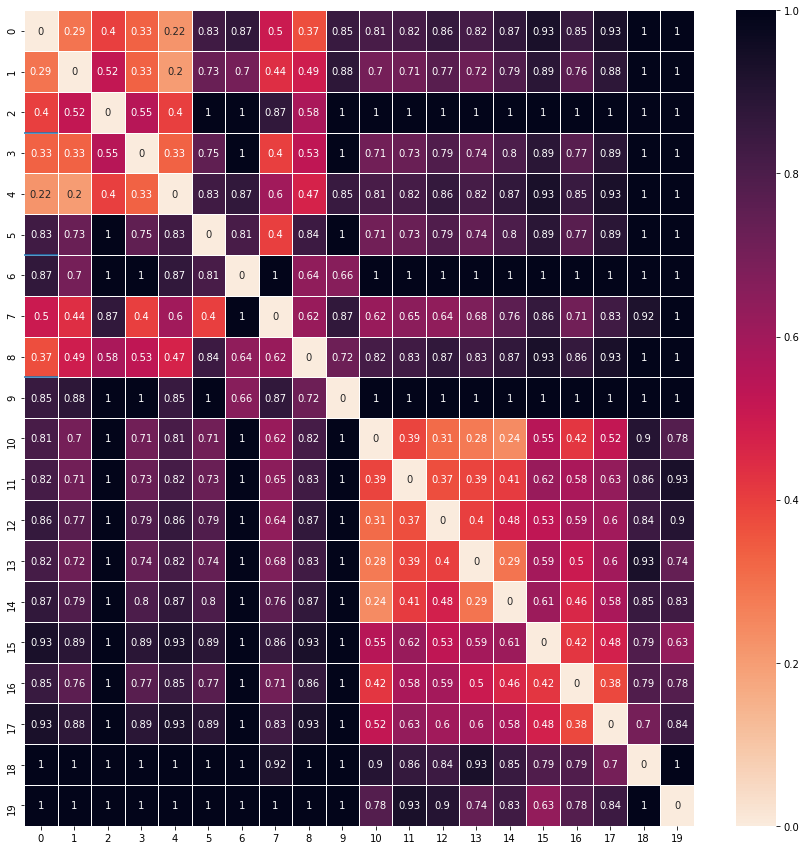

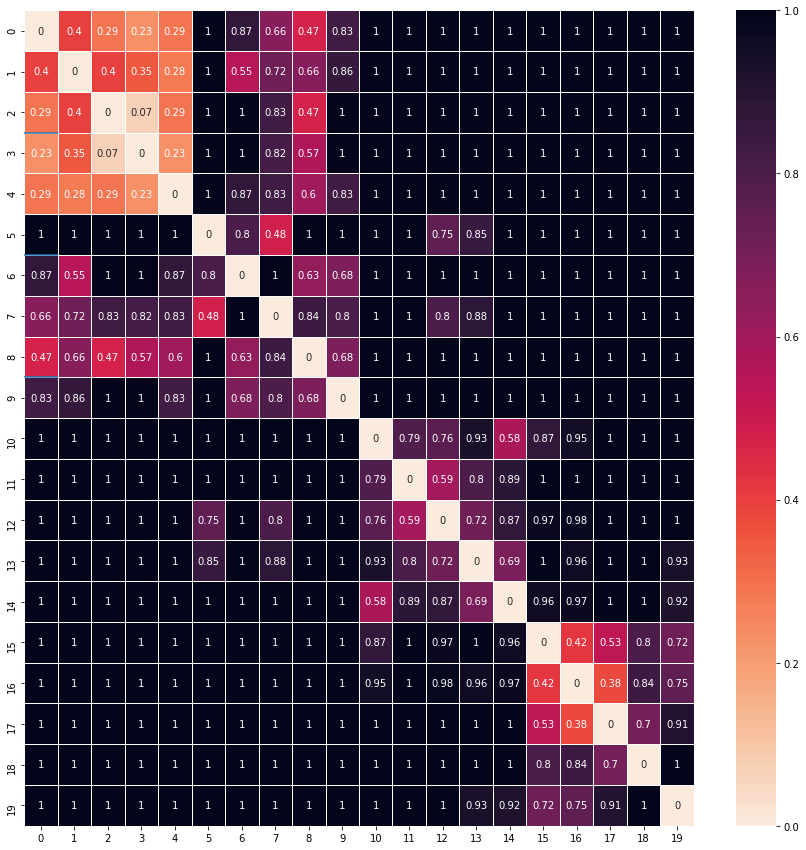

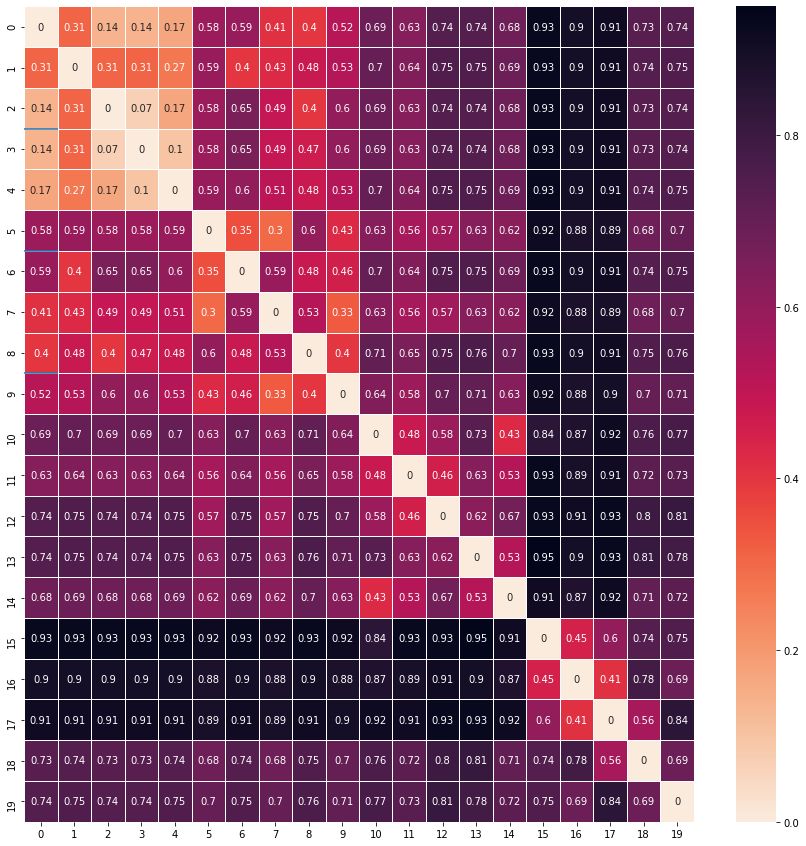

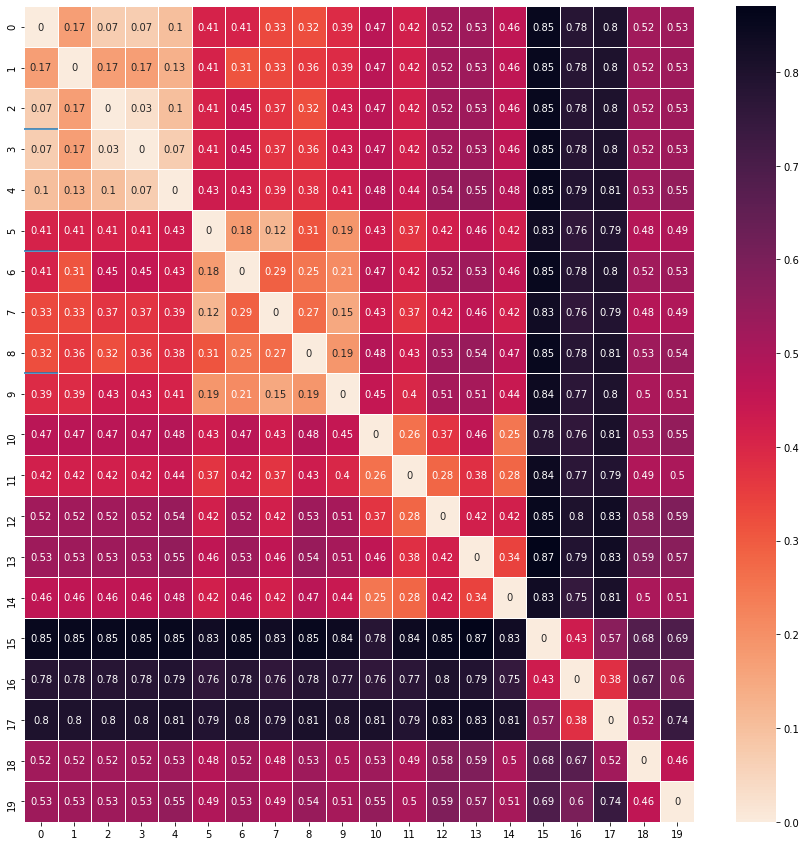

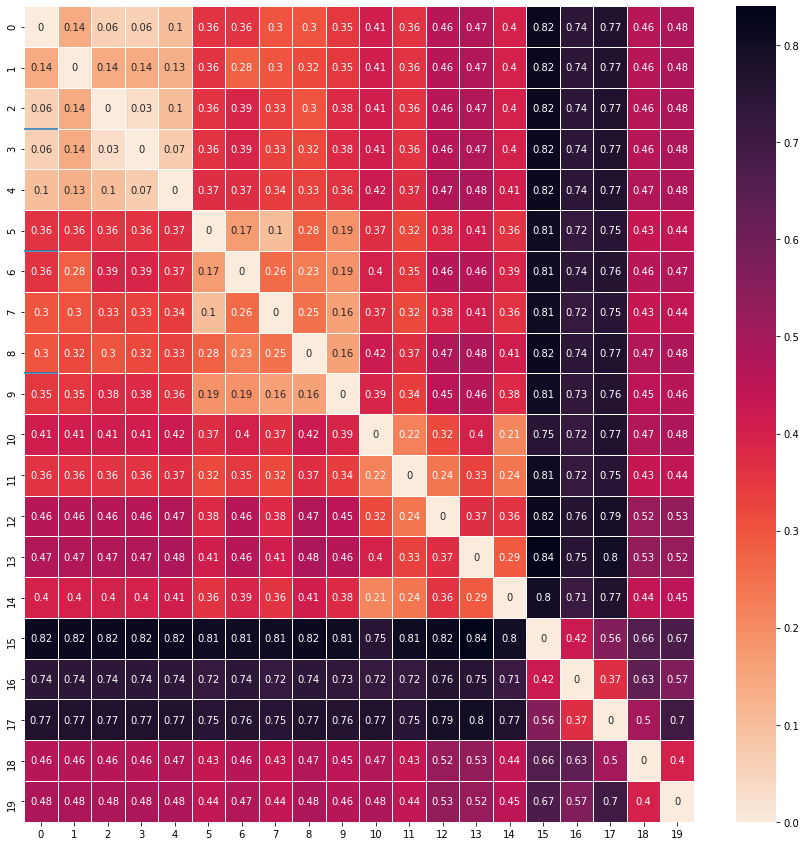

In [4]:
for _data in [data.description, data.clean_description, data.clean_description2, data.clean_description3, data.clean_description4]:
    tfidf = CountVectorizer(ngram_range=(1,2), min_df=0.1)
    embeddings = tfidf.fit_transform(_data)
    m = get_similarity_matrix(embeddings, cosine_distances)
    
    true_labels = ["pizza"]*5 + ["paste"]*5 + ["book"]*5 + ["dipers"]*5

    acc = 0
    for embedding, label in zip(embeddings, true_labels):
        acc += (data.iloc[np.argsort(cosine_distances(embedding, embeddings)).squeeze()].category[:5] == label).sum()/5
    #     print(acc)
    acc = acc/embeddings.shape[0]
    print(acc)

0.8100000000000002
0.8400000000000001
0.89
0.96
0.9700000000000001


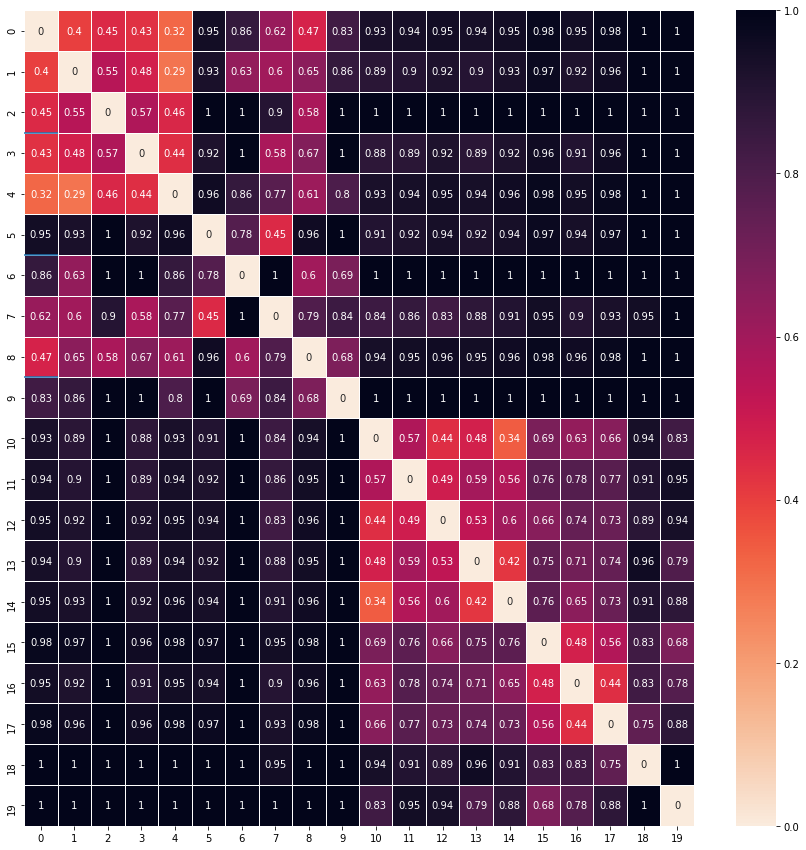

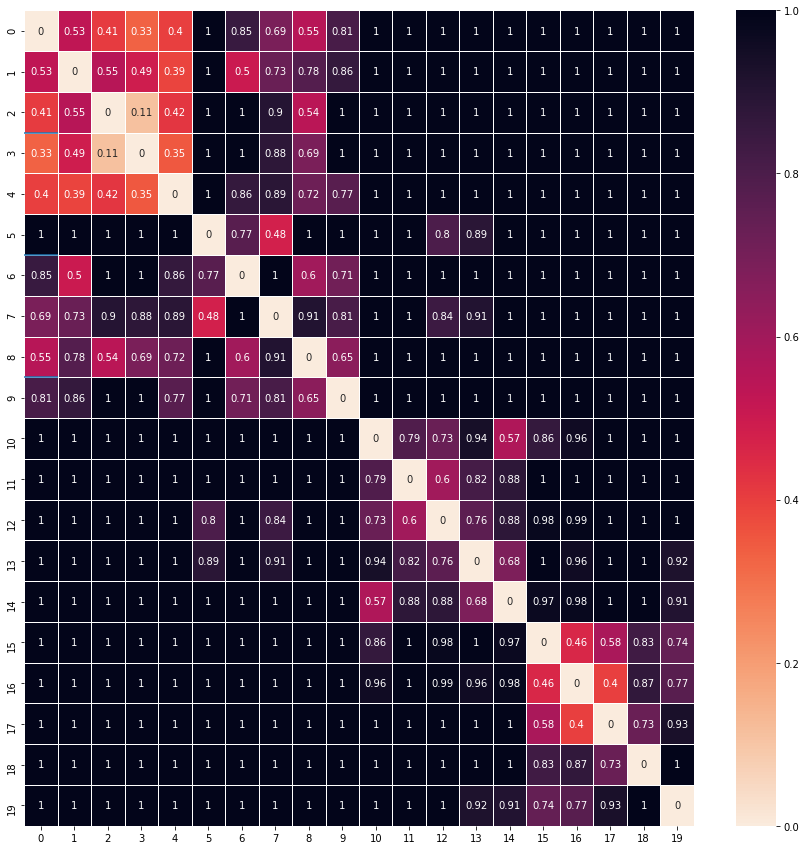

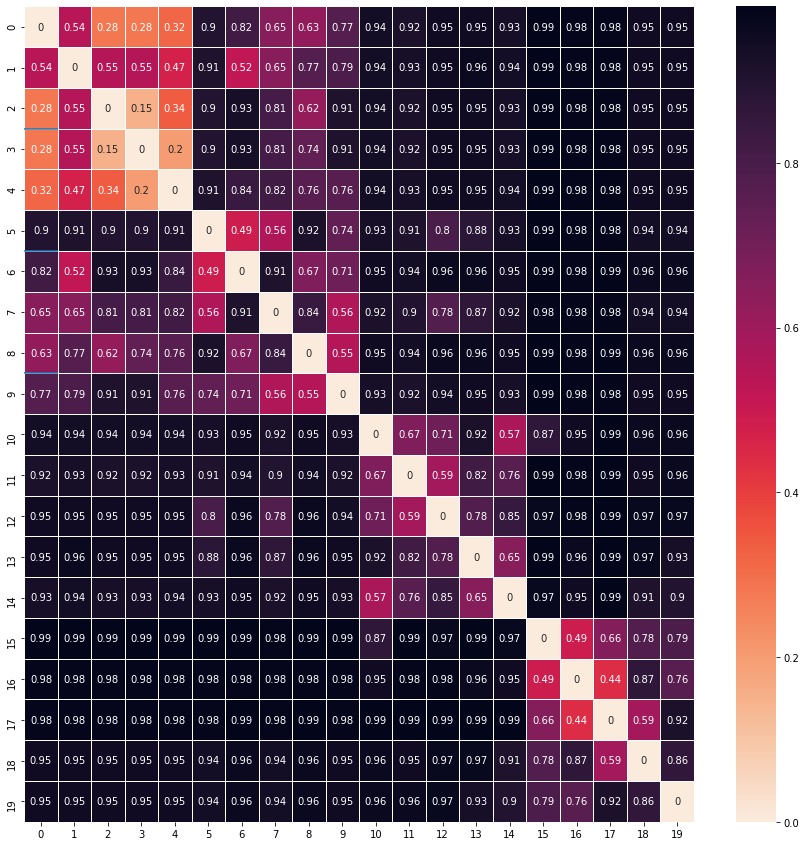

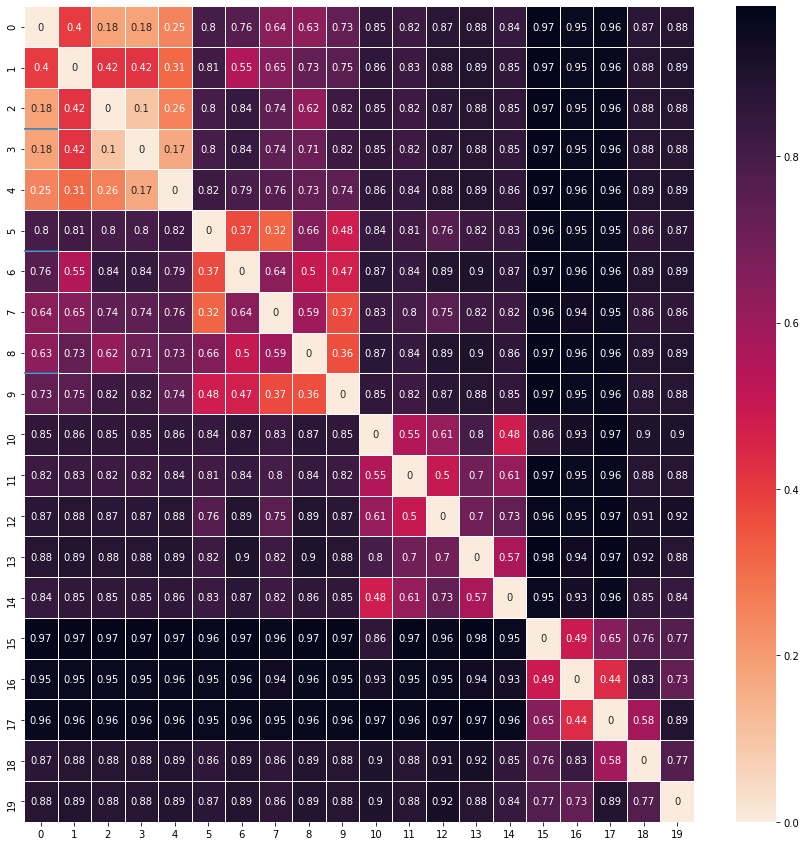

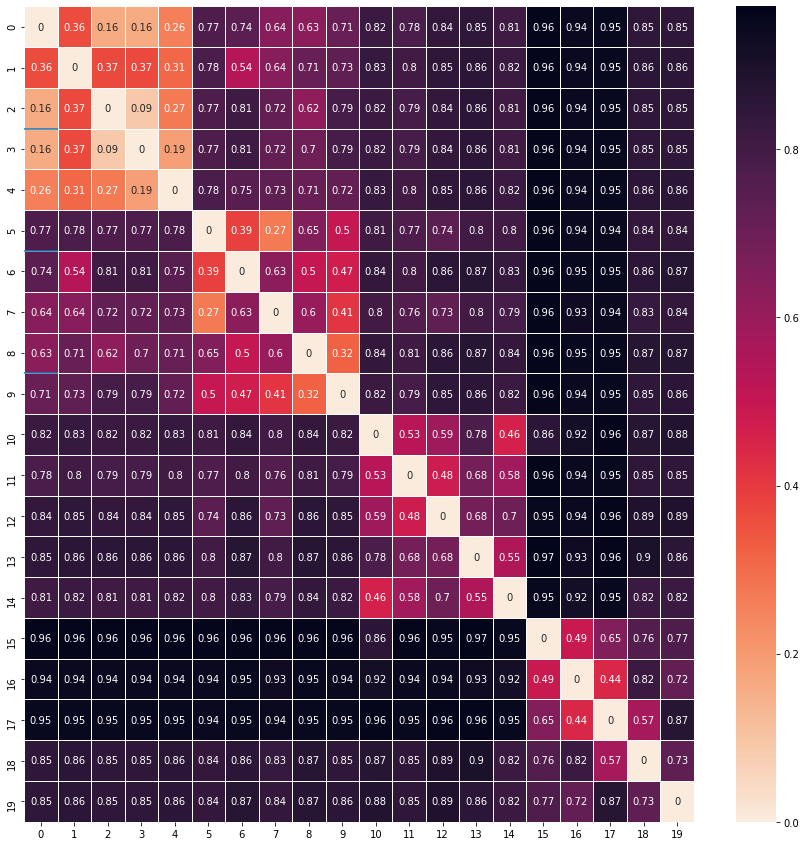

In [5]:
for _data in [data.description, data.clean_description, data.clean_description2, data.clean_description3, data.clean_description4]:
    tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=0.1)
    embeddings = tfidf.fit_transform(_data)
    m = get_similarity_matrix(embeddings, cosine_distances)
    
    true_labels = ["pizza"]*5 + ["paste"]*5 + ["book"]*5 + ["dipers"]*5

    acc = 0
    for embedding, label in zip(embeddings, true_labels):
        acc += (data.iloc[np.argsort(cosine_distances(embedding, embeddings)).squeeze()].category[:5] == label).sum()/5
    #     print(acc)
    acc = acc/embeddings.shape[0]
    print(acc)